# Example 1: Malus law

In this example, we analyze, from a computational point of view the Malus law (https://en.wikipedia.org/wiki/Polarizer) for Jones and Stokes-Mueller formalisms. We will also analyze the cases of perfect and imperfect polarizers.

A polarizer is an ideal optical device that allows light to be transmitted without loss when the electric field vector is parallel to the polarizer transmission axis, and blocks it when perpendicular to the transmission axis (i.e., parallel to the extinction axis). In the case of two ideal polarizers, and a circularly polariced incident light wave, the light intensity that passes through them depends on the angle between their transmission axes: 

$I(\theta) = \frac{I_{0}}{2} * cos(\theta_1 - \theta_0)^2$.

Being $I_0$ the intensity of the incident wave and $\theta_i$ the azimuth of the i-th polarizer.

The case of imperfect polarizers is slightly different. They block part of the light that passes through them when the electric field is parallel to their transmission axis. This is described by their electric field maximum transmission ($p_1$) or their intensity maximum transmission ($T_{max} = p_1^2$). Also, those polarizers don't block all of the light that passes through them when the electric field is parallel to the extinction axis. This is described by their electric field minimum transmission ($p_2$) or their intensity minimum transmission ($T_{min} = p_2^2$). In that case, the equation of the Malus law gets a little more complicated:

$I(\theta) = \frac{I_{0}}{2} * [T_{min} + (T_{max} - T_{min}) * cos(\theta_1 - \theta_0)^2]$.

## Jones formalism

Let us start by Jones formalism. Jones formalism is easier to visualize and understand.

### Perfect polarizers

This is the easiest case. Start by importing all the required modules and classes.

In [5]:
import numpy as np

from py_pol import degrees
from py_pol.jones_vector import Jones_vector
from py_pol.jones_matrix import Jones_matrix

It is usual to work with circular polarization for the incident wave as, in that case, the intensity that passes through the first polarizer is independent of the azimuth of the polarizer.

In [6]:
# Incident wave
E0 = Jones_vector('Incident wave')
E0.circular_light(intensity=1)
print(E0)

Incident wave = 
[+0.707+0.000j]   
[+0.000+0.707j]   



Now, let us define the first ideal polarizer, with the azimuth of the transmission axis at 50º, and a second polarizer with angles between 0º and 360º.

In [21]:
# First polarizer
P0 = Jones_matrix('Polarizer 0')
P0.diattenuator_perfect(azimuth=50 * degrees)

# Second polarizer
P1 = Jones_matrix('Polarizer 0')
angles = np.linspace(0, 360*degrees, 361) # Steps of 1 degree
P1.diattenuator_perfect(azimuth=angles);

The resulting electric field is calculated by multiplying the original field $E_0$ by the two polarizers, first $P_0$ and then $P_1$. In polarization, the first optical element to be passed through must be at the right position:

In [22]:
E_final = P1 * P0 * E0
E_final.name = 'Output wave'

Now, let us plot the intensity in terms of the angle. All the methods in the *parameters* class allow doing it setting the draw argument to True.

The intensity of Output wave is (a.u.):
The mean value is 0.2498797450293165 +- 0.1765464271966945


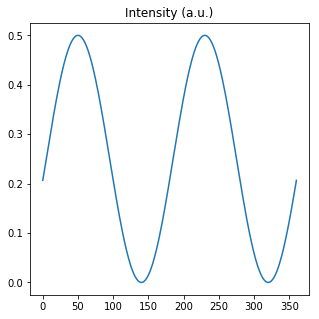

In [23]:
I_perfect = E_final.parameters.intensity(draw=True)

The maximum of intensity is achieved when the transmission angles of $P_0$ and $P_1$ are parallel: when the azimuth of $P_1$ = 50º and 230º.

### Imperfect polarizers

Imperfect polarizers can be considered a good model for most real polarizers. Again, start by importing the required modules and classes.

In [10]:
import numpy as np

from py_pol import degrees
from py_pol.jones_vector import Jones_vector
from py_pol.jones_matrix import Jones_matrix

It is usual to work with circular polarization for the incident wave as, in that case, the intensity that passes through the first polarizer is independent of the azimuth of the polarizer.

In [11]:
# Incident wave
E0 = Jones_vector('Incident wave')
E0.circular_light(intensity=1)
print(E0)

Incident wave = 
[+0.707+0.000j]   
[+0.000+0.707j]   



The ideal polarizers described by their transmissions and azimuth are called linear polarizers (the states of maximum and minimum transmission are linear polarization states). Let us define the first linear polarizer, with the azimuth of the transmission axis at 50º, and a second polarizer with angles between 0º and 360º. We will use some transmission values far from the ideal behavior.

In [26]:
# First polarizer
P0 = Jones_matrix('Polarizer 0')
P0.diattenuator_linear(Tmax=0.8, Tmin=0.2, azimuth=50 * degrees)

# Second polarizer
P1 = Jones_matrix('Polarizer 0')
angles = np.linspace(0, 360*degrees, 361) # Steps of 1 degree
P1.diattenuator_linear(Tmax=0.8, Tmin=0.2, azimuth=angles);

The resulting electric field is calculated by multiplying the original field $E_0$ by the two polarizers, first $P_0$ and then $P_1$. In polarization, the first optical element to be passed through must be at the right position:

In [27]:
E_final = P1 * P0 * E0
E_final.name = 'Output wave'

Now, let us plot the intensity in terms of the angle. All the methods in the *parameters* class allow doing it setting the draw argument to True.

The intensity of Output wave is (a.u.):
The mean value is 0.2499567082105539 +- 0.06355671379081002


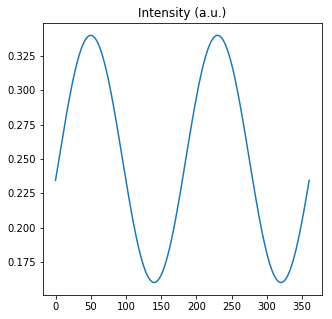

In [28]:
I_imperfect = E_final.parameters.intensity(draw=True)

The maximum of intensity is achieved when the transmission angles of $P_0$ and $P_1$ are parallel: when the azimuth of $P_1$ = 50º and 230º. However, this case differs from the case of perfect polarizers as the maximum achieved intensity is smaller and the minimum intensity is higher.

## Mueller-Stokes formalism

Mueller-Stokes formalism is more complicated than Jones formalism, but allows working with partial polarization states. This example uses completely polarized light, but it is a good example to start using *Mueller* and *Stokes* classes.

### Perfect polarizers

This is the easiest case. Start by importing all the required modules and classes.

In [2]:
import numpy as np

from py_pol import degrees
from py_pol.stokes import Stokes
from py_pol.mueller import Mueller

It is usual to work with circular polarization for the incident wave as, in that case, the intensity that passes through the first polarizer is independent of the azimuth of the polarizer.

In [3]:
# Incident wave
S0 = Stokes('Incident wave')
S0.circular_light(intensity=1)
print(S0)

Incident wave = 
[+1.000]   
[+0.000]   
[+0.000]   
[+1.000]   



Now, let us define the first ideal polarizer, with the azimuth of the transmission axis at 50º, and a second polarizer with angles between 0º and 360º.

In [29]:
# First polarizer
P0 = Mueller('Polarizer 0')
P0.diattenuator_perfect(azimuth=50 * degrees)

# Second polarizer
P1 = Mueller('Polarizer 0')
angles = np.linspace(0, 360*degrees, 361) # Steps of 1 degree
P1.diattenuator_perfect(azimuth=angles);

The resulting Stokes vector is calculated by multiplying the original Stokes vector $S_0$ by the two polarizers, first $P_0$ and then $P_1$. In polarization, the first optical element to be passed through must be at the right position:

In [30]:
S_final = P1 * P0 * S0
S_final.name = 'Output wave'

d:\codigo_ucm\py_pol\py_pol\stokes.py:806: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(ratio[2])**2 * S3**2) / S0


Now, let us plot the intensity in terms of the angle. All the methods in the *parameters* class allow doing it setting the draw argument to True.

The intensity of Output wave is (a.u.):
The mean value is 0.24987974502931648 +- 0.17654642719669453


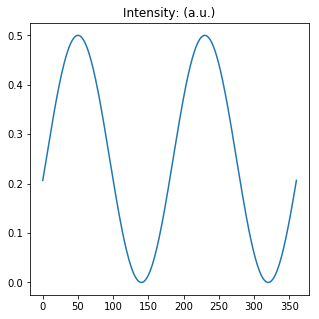

In [31]:
I_perfect = S_final.parameters.intensity(draw=True)

The maximum of intensity is achieved when the transmission angles of $P_0$ and $P_1$ are parallel: when the azimuth of $P_1$ = 50º and 230º.

### Imperfect polarizers

Imperfect polarizers can be considered a good model for most real polarizers. Again, start by importing the required modules and classes.

In [24]:
import numpy as np

from py_pol import degrees
from py_pol.stokes import Stokes
from py_pol.mueller import Mueller

It is usual to work with circular polarization for the incident wave as, in that case, the intensity that passes through the first polarizer is independent of the azimuth of the polarizer.

In [3]:
# Incident wave
S0 = Stokes('Incident wave')
S0.circular_light(intensity=1)
print(S0)

Incident wave = 
[+1.000]   
[+0.000]   
[+0.000]   
[+1.000]   



The ideal polarizers described by their transmissions and azimuth are called linear polarizers (the states of maximum and minimum transmission are linear polarization states). Let us define the first linear polarizer, with the azimuth of the transmission axis at 50º, and a second polarizer with angles between 0º and 360º. We will use some transmission values far from the ideal behavior.

In [32]:
# First polarizer
P0 = Mueller('Polarizer 0')
P0.diattenuator_linear(Tmax=0.8, Tmin=0.2, azimuth=50 * degrees)

# Second polarizer
P1 = Mueller('Polarizer 0')
angles = np.linspace(0, 360*degrees, 361) # Steps of 1 degree
P1.diattenuator_linear(Tmax=0.8, Tmin=0.2, azimuth=angles);

The resulting Stokes vector is calculated by multiplying the original Stokes vector $S_0$ by the two polarizers, first $P_0$ and then $P_1$. In polarization, the first optical element to be passed through must be at the right position:

In [33]:
S_final = P1 * P0 * S0
S_final.name = 'Output wave'

Now, let us plot the intensity in terms of the angle. All the methods in the *parameters* class allow doing it setting the draw argument to True.

The intensity of Output wave is (a.u.):
The mean value is 0.24995670821055394 +- 0.06355671379081004


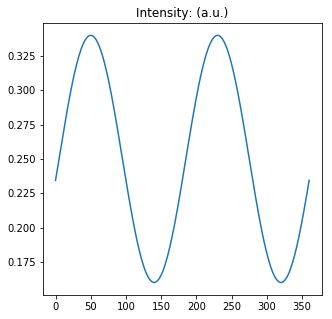

In [34]:
I_perfect = S_final.parameters.intensity(draw=True)

The maximum of intensity is achieved when the transmission angles of $P_0$ and $P_1$ are parallel: when the azimuth of $P_1$ = 50º and 230º. However, this case differs from the case of perfect polarizers as the maximum achieved intensity is smaller and the minimum intensity is higher.